*Licensed under the MIT License. See LICENSE-CODE in the repository root for details.*

*Copyright (c) 2025 Eleni Kamateri*

This script plots the number of patent documents per kind code. It utilizes a CSV file that contains essential data for analyzing patent documents within a specific core vertical (e.g., EP). 

### Set the required parameters for the script

In [1]:
csv_file_path='/YOUR_PATH/EP_csv_file_for_wpi_analysis.csv'
sep=0

### Import all required libraries for the script

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MultiLabelBinarizer

### Import the CSV file and load its data into a DataFrame

In [3]:
if sep==0:
    DF = pd.read_csv(csv_file_path, header=0, delimiter=";") #, nrows=1000)
elif sep==1:
    DF = pd.read_csv(csv_file_path, header=0) #, nrows=1000)
else:
    print("Please provide a valid value for sep")

print(DF.shape)
DF.head(1)

(552439, 11)


,Unnamed: 0,xml_file_name,ucid,date,main_classification,further_classification,classification_ipcr,classification_cpc,abstract_lang_en_exist,description_lang_en_exist,claims_lang_en_exist
0,0,EP-2677851-A1.xml,EP-2677851-A1,20140101,NaN,NaN,A01B 79/02 20060101AFI20120911BHEP ...,A01B 79/005 20130101 LI20150420BHEP ...,1.0,1.0,1.0


### Identify the patent number and kind code, and append these fields to the initial DataFrame

In [5]:
DF['patent_number']=DF['xml_file_name'].str.split(".").str[0]
DF['patent_number']=DF['patent_number'].str.split("-").str[1:2]
DF['patent_number']=DF['patent_number'].str.join('')

DF['kind_code']=DF['xml_file_name'].str.split(".").str[0]
DF['kind_code']=DF['kind_code'].str.split("-").str[2:3]
DF['kind_code']=DF['kind_code'].str.join('')

DF['kind_code_letter']=DF['kind_code'].str[0]

### Plot the distribution of files per kind code

Counter({'A1': 235722, 'B1': 133013, 'A4': 97787, 'A2': 47224, 'A3': 34146, 'B2': 1735, 'B8': 1601, 'B9': 529, 'A8': 359, 'A9': 250, 'B3': 73})


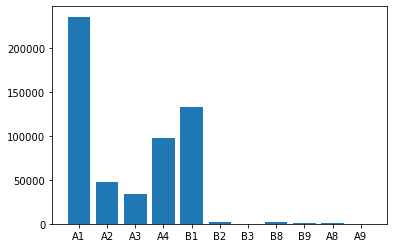

In [6]:
print(Counter(DF['kind_code']))

plot1 = Counter(DF['kind_code'])
plt.bar(plot1.keys(), plot1.values())
plt.show()